In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
Y_train = pd.read_csv('../data/Y_train.csv')
Y_test = pd.read_csv('../data/Y_test.csv')

FS_DT = pd.read_csv('../data/FS_decision_tree.csv').values.flatten()
FS_RF = pd.read_csv('../data/FS_random_forest.csv').values.flatten()

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2342, 139), (586, 139), (2342, 1), (586, 1))

# Random forest regressor

In [2]:
parameters = {
    'bootstrap': [True],
    'criterion': ["friedman_mse"],
    'max_depth': [20, 60, 100, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [120,150,170],
    'random_state': [100, 200, 300]
}

X_train_FS_DT = X_train[FS_DT]
X_test_FS_DT = X_test[FS_DT]
X_train_FS_RF = X_train[FS_RF]
X_test_FS_RF = X_test[FS_RF]

rndF = RandomForestRegressor()
tuned_model_1 = GridSearchCV(rndF, parameters, cv=5, n_jobs = 6, verbose=4)
tuned_model_1.fit(X_train_FS_DT, Y_train.values.ravel())

print ("\nBest Score: {:.3f}".format(tuned_model_1.best_score_) )
print ("Best Params: ", tuned_model_1.best_params_)

train_pre = tuned_model_1.predict(X_train_FS_DT)
test_pre = tuned_model_1.predict(X_test_FS_DT)

print("\nTrain MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Best Score: 0.886
Best Params:  {'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 60, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 170, 'random_state': 300}

Train MSE: 115589364.876
Test MSE: 811744732.518
Train R^2: 0.981
Test R^2: 0.899


Text(0, 0.5, 'Sale_Price')

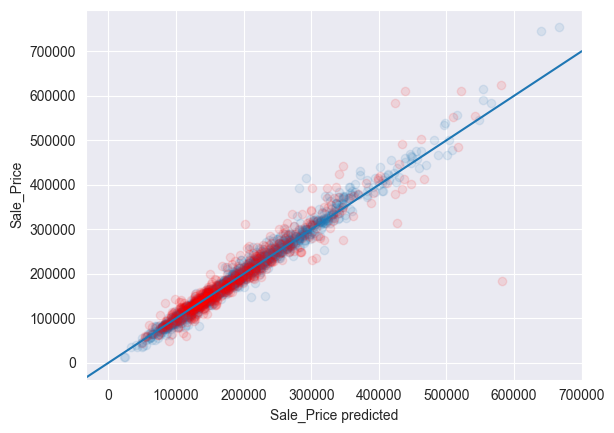

In [3]:
fig, axs = plt.subplots()
axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

# Proviamo con le features scelte dal random forest

In [4]:
tuned_model_2 = GridSearchCV(rndF, parameters, cv=5, n_jobs = 6, verbose=4)
tuned_model_2.fit(X_train_FS_RF, Y_train.values.ravel())

print ("\nBest Score: {:.3f}".format(tuned_model_2.best_score_) )
print ("Best Params: ", tuned_model_2.best_params_)

train_pre = tuned_model_2.predict(X_train_FS_RF)
test_pre = tuned_model_2.predict(X_test_FS_RF)

print("\nTrain MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Best Score: 0.886
Best Params:  {'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 60, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 170, 'random_state': 300}

Train MSE: 115535634.430
Test MSE: 795859674.345
Train R^2: 0.981
Test R^2: 0.901


Text(0, 0.5, 'Sale_Price')

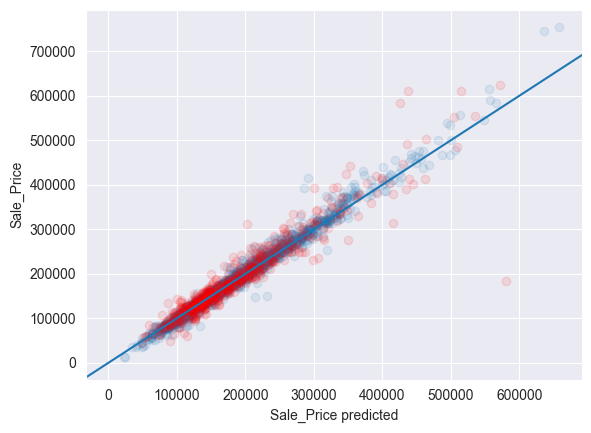

In [5]:
fig, axs = plt.subplots()
axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')